# Support Vector Machines

* capable of performing linear or non-linear classification, regression and even novelty detection.

* it works very nice with small to medium-sized non-linear dataset (i.e, hundereds or thousands of instances), especially for classification task.

* doesn't scale very well to very lasrge dataset.

* SVMs are sensitive to the feature scales.

## Linear SVM classification

* when decision boundaries come close to the instances that these models will probably not perform as well on new instances.

* Decision boundries of SVM classifier not only separate the two classes but also stayes as far away from the closest training instances as possible.


## Setup

In [2]:
import sys

assert sys.version_info >=(3,7)

In [3]:
from packaging import version

import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

define the default font sizes to make the figures prettier.

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Create the images/svm folder , and define the save_fig() function which is used through this notebook to save the figures.

In [5]:
from pathlib import Path
IMAGES_PATH=Path()
print(Path())
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=IMAGES_PATH/ f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

.


## Linear SVM Classification

In below left plot showsthe dicision boundries of three possible linear classifiers, in the same plot dashed green line is so bad, other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not perform as well on new instances.

in the right side plot, the solid line represent the decision boundary of an SVM classifier; the line not only separate two classes but also stays as far away from the closest training instances as possible.

SVC(C=1e+100, kernel='linear')
-3.7882347112962464


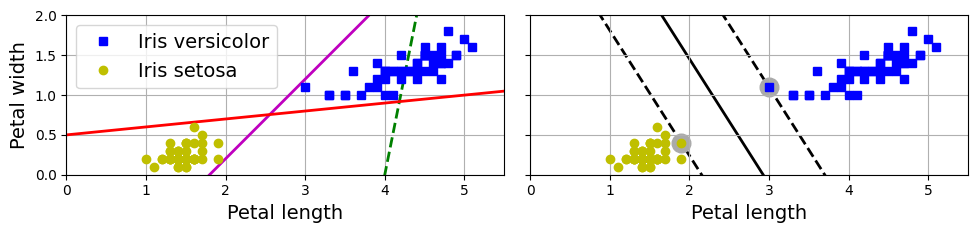

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris= datasets.load_iris(as_frame=True)
X= iris.data[["petal length (cm)","petal width (cm)"]].values
y= iris.target

setosa_or_versicolor= (y==0) |(y==1)

# taking only instances those are either Setosa or Versicolor
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

#SVM classification model
svm_clf= SVC(kernel="linear", C=1e100)
svm_clf.fit(X,y)

#Bad models========================
x0=np.linspace(0,5.5, 200)
pred_1= 5 * x0 -20
pred_2=x0-1.8
pred_3=0.1 * x0 + 0.5
#====================================



def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  print(svm_clf) #o/p: SVC(C=1e+100, kernel='linear')
  w= svm_clf.coef_[0] # to get the coefficient.
  b= svm_clf.intercept_[0]
  print(b) #intercept_ = -3.7882347112962464

  # At the decision boundary, w0 * x0 + w1 * x1 + b=0
  # => x1= -w0/w1 * x0 - b/w1
  x0= np.linspace(xmin, xmax, 200)
  decision_boundary=-w[0]/w[1] * x0 - b/w[1] # this is the equation to find decision boundary

  margin=1/w[1]

  gutter_up= decision_boundary +margin #get the support vector array (+ve)
  #print("decision_boundary",decision_boundary)
  gutter_down= decision_boundary - margin #get the support vector array (-ve)
  svs= svm_clf.support_vectors_

  plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
  plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
  plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
  plt.scatter(svs[:,0], svs[:,1], s=180, facecolor="#AAA", zorder=-1)

fig,axes= plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="Iris setosa")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0,5.5,0,2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1],"bs")
plt.plot(X[:,0][y==0], X[:,1][y==0],"yo")
plt.xlabel("Petal length")
plt.axis([0,5.5,0,2])
plt.gca().set_aspect("equal")
plt.grid()
save_fig("large_margin_classification_plot")
plt.show()


SVMs are sensitive to the feature scales, below code plot the same and shows difference with scaled and unscaled data

SVC(C=100, kernel='linear')
-9.689655172413756
SVC(C=100, kernel='linear')
0.06246103334441508


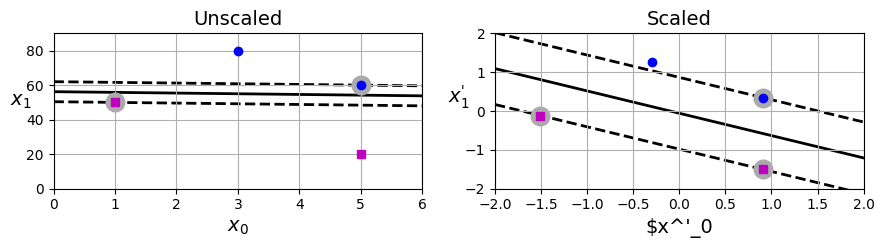

In [7]:
from sklearn.preprocessing import StandardScaler

Xs= np.array([[1,50], [5,20], [3,80],[5,60]]).astype(np.float64)
ys= np.array([0,0,1,1])
svm_clf=SVC(kernel="linear", C=100).fit(Xs,ys)

scaler= StandardScaler()

X_scaled= scaler.fit_transform(Xs)
svm_clf_scaled= SVC(kernel="linear", C=100).fit(X_scaled,ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1], Xs[:,1][ys==1],"bo")
plt.plot(Xs[:,0][ys==0], Xs[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf, 0,6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation=0)
plt.title("Unscaled")
plt.axis([0,6,0,90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],"ms")

plot_svc_decision_boundary(svm_clf_scaled,-2,2)
plt.xlabel("$x^'_0")
plt.ylabel("$x^'_1$ ",rotation=0)
plt.title("Scaled")
plt.axis([-2,2,-2,2])
plt.grid()
save_fig("sensitivity_to_feature_scales_plot")
plt.show()

## Soft Margin Classification

* When we strictly impose that all instances must be off the street and on the correct side, this is called *hard margin classification*.
problems with hard margin classification:
1. It works if the data is linearly separable
2. Sensitive to outliers.



SVC(C=1000000000, kernel='linear')
-16.99262620355056


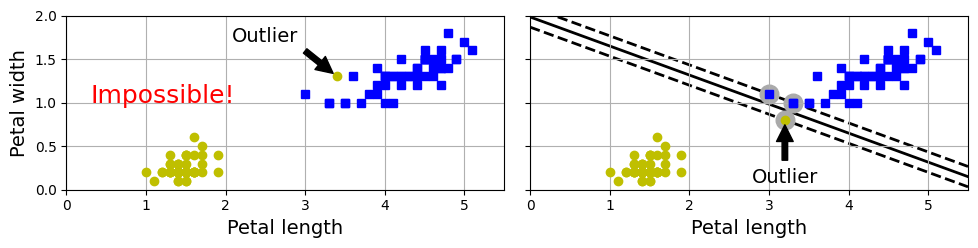

In [8]:
X_outliers= np.array([[3.4,1.3],[3.2,0.8] ])
y_outliers= np.array([0,0])

Xo1=np.concatenate([X,X_outliers[:1]], axis =0)
yo1=np.concatenate([y,y_outliers[:1]], axis =0)
Xo2=np.concatenate([X,X_outliers[1:]], axis =0)
yo2=np.concatenate([y,y_outliers[1:]], axis =0)

svm_clf2=SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2,yo2)

fig,axes= plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:,0][yo1==1], Xo1[:,1][yo1==1],"bs")
plt.plot(Xo1[:,0][yo1==0], Xo1[:,1][yo1==0],"yo")

plt.text(0.3,1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5,1.7),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.1),
)

plt.axis([0,5.5,0,2])

plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:,0][yo2==1],Xo2[:,1][yo2==1],"bs")
plt.plot(Xo2[:,0][yo2==0],Xo2[:,1][yo2==0],"yo")

plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2,0.08),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.1),
)

plt.axis([0,5.5,0,2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

To avoid above need a flexible model. Objective is to find a good balance between keeping the street as large a possible and limiting the *margin violations*(i.e., instances that end up in the middle of the street or even on the wrong side), this is called *soft margin classification*.

When creating SVM model can specify several hyperparameters, including the regulariation hyperparameter `C`. If set to low value , then it will end up with the model on the left with high value.

Reducing `C` makes street larger , but it also leades to more margin violation. Reducing `C` results in more instances supporting the street, so less risk of overfitting, reducing too much the value of `C` will end up model underfitting.

In below plot the model with `C=100` will generalize bettwe than the one with `C=1`

If model is overfitting , can try regularizing it by reducing `C`

Below code loads the iris dataset and trains a linear SVM classidier to detect *Iris virginica flowers*

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)","petal width (cm)"]].values
y=(iris.target==2) #Iris virginica

svm_clf=make_pipeline(StandardScaler(), LinearSVC(C=1,dual=True, random_state=42))

svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [10]:
X_new= [[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [11]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

LinearSVC(C=1, max_iter=10000, random_state=42)
[-7.91668565]
LinearSVC(C=100, max_iter=10000, random_state=42)
[-13.63250135]


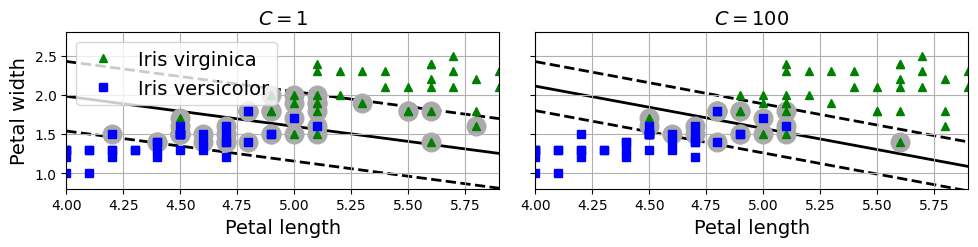

In [12]:
scaler=StandardScaler()
svm_clf1= LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2= LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1= make_pipeline(scaler, svm_clf1)
scaled_svm_clf2= make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

# convert to unscaled parameters
b1= svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2= svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1=svm_clf1.coef_[0] /scaler.scale_
w2=svm_clf2.coef_[0] /scaler.scale_

svm_clf1.intercept_=np.array([b1])
svm_clf2.intercept_=np.array([b2])

svm_clf1.coef_= np.array([w1])
svm_clf2.coef_= np.array([w2])

#Find support vectors (LinearSVC does not do this automatially)
t= y * 2 -1
support_vectors_idx1=(t * (X.dot(w1)+b1)<1).ravel()
support_vectors_idx2=(t * (X.dot(w2)+b2)<1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


fig, axes= plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:,0][y==1], X[:,1][y==1],"g^", label="Iris virginica")
plt.plot(X[:,0][y==0], X[:,1][y==0],"bs", label="Iris versicolor")

plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4,5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:,0][y==1], X[:,1][y==1],"g^")
plt.plot(X[:,0][y==0], X[:,1][y==0],"bs")

plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C= {svm_clf2.C}$")
plt.axis([4,5.9,0.8,2.8])
plt.grid()
save_fig("regularization_plot")
plt.show()

Unlike `LogisticRegression`, `LinearSVC` doesn't have a `predict_proba()` method to estimate the class probabilities. If use `SVC` class instead of `LinearSVC` and set its `probability` hyperparameter to `True`, then the model will fit an extra model at the end of training to map the SVM decision function scores to estimated probabilities.Under the hood this requires using 5-fold cross-validation to generate out-of-sampe predictions for every instance in the training set, then training a `LogisticRegression` model, so it will slow down training considerably, after that the `predict_proba()` and `predict_log_proba()` methods will be available.

## Nonlinear SVM Classification

Many dataset are not even close to being linearly separable.
One approach to handle non-linear datasets is to add more features, such as polynomial features. in some cases this can result in a linearly separable dataset.

below is the example where $x_1$ is not linearly separable but $x_2=x_1^2$ is perfectly linearly separable.

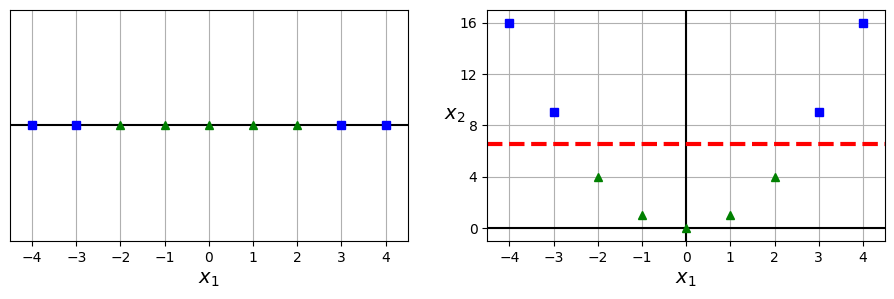

In [13]:
X1D= np.linspace(-4,4,9).reshape(-1,1) # 9 X 1 matrix
X2D= np.c_[X1D, X1D**2] #NumPy's c_ function to stack two arrays column-wise!
y=np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.plot(X1D[:,0][y==0], np.zeros(4), "bs") #y has 4 zeros
plt.plot(X1D[:,0][y==1], np.zeros(5),"g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.plot(X2D[:,0][y==0],X2D[:,1][y==0],"bs")
plt.plot(X2D[:,0][y==1],X2D[:,1][y==1],"g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.plot([-4.5,4.5],[6.5,6.5],"r--", linewidth=3)
plt.axis([-4.5,4.5,-1,17])
plt.subplots_adjust(right=1)
save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

above code can be rewritten with the help of sklearn library.

In [14]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y= make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf=make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

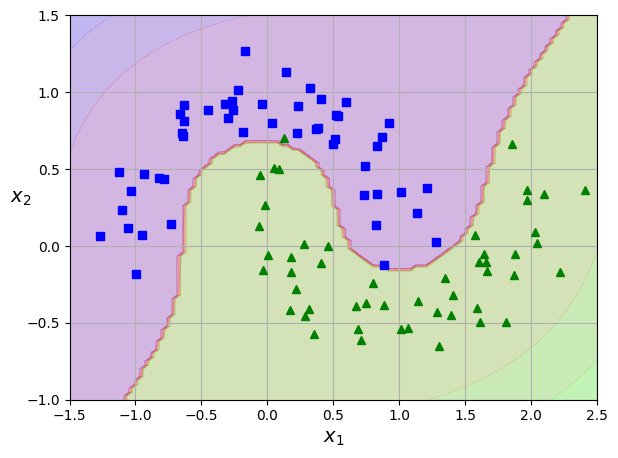

In [15]:
def plot_dataset(X,y, axes):
  plt.plot(X[:,0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:,0][y==1], X[:, 1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
  x0s= np.linspace(axes[0], axes[1], 100)
  x1s= np.linspace(axes[2], axes[3], 100)
  x0, x1= np.meshgrid(x0s, x1s)
  X=np.c_[x0.ravel(), x1.ravel()]
  y_pred=clf.predict(X).reshape(x0.shape)
  y_decision= clf.decision_function(X).reshape(x0.shape) # it returns the decision function value for the samples in X,
  #it represent the distance of each sample from the decision boundary.



  plt.contourf(x0,x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y, [-1.5,2.5,-1,1.5])

save_fig("moon_polynomial_svc_plot")
plt.show()


## Polynomial Kernel

Issue with Polynomial features:

Polynomial features is simpleto implement and can work great with all sorts of machine learning algorithms (not jus SVMs).At a low polynomial degree this methid cannot deal with very complex dataset and with a high polynomial degree it creates a huge number of features, making the model too slow.

When using SVMs , can apply an technique called the *kernel trick*. It helps to get the same result as adding many polynomial features, even with a very high degree, without actually having to add them.This means there's no combinatorial explosion of the number of features.



In [16]:
from sklearn.svm import SVC

poly_kernel_svm_clf= make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In below code it is using 10th degree polynomial kernel, in case of overfitting reduce the degree. In case of underfitting can try increasing degree.

the hyperparameter `coef0` controls how much the model is influenced by high-degree terms versus low-degree terms.

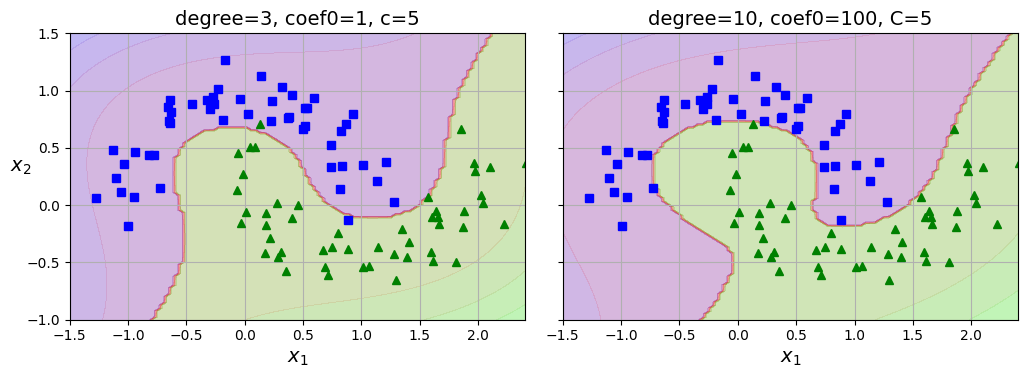

In [17]:
poly100_kernel_svm_clf= make_pipeline(
    StandardScaler(), SVC(kernel="poly", degree=10, coef0=100, C=5)
)

poly100_kernel_svm_clf.fit(X,y)

fig,axes= plt.subplots(ncols=2, figsize=(10.5,4), sharey=True)

'''
plt.sca is the command which sets the current axis to the first element of the axes array.
sca stands for  "set current axis" and it is sed to specify which axis to operate on. in this condition it selecting
the first axis in the array

'''
plt.sca(axes[0])

plot_predictions(poly_kernel_svm_clf, [-1.5,2.45,-1,1.5]) # SVM model trained with polynomial features
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title("degree=3, coef0=1, c=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5,2.45,-1,1.5])

plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Similarity Features

* to takle nonlinear problems is to add features computed using a similarity function.

example:

* Taking a 1D dataset from earlier and adding two landmarks to it at $x_1=-2$ and $x_1=1$.

* defining `similarity function` to be the `Gaussian RBF` with $γ= 0.3$. This is a bell shaped function varying from 0 (far away from landmark) to 1 (at the landmark)

* now, from the dataset using one instance where suppose $x_1=-1$: it is located at a distance of 1 from the first landmark ($x_1=-2$) and distance of 2 from another landmark $x_1=1$

* now will compute the new features for the instance with 2 landmark distance from instance (2,1) $x_1=-2$ and $x_1=1$, new features are $x_2=exp(-0.3 \times 1^2) \approx 0.74$ and $x_2=exp(-0.3 \times 2^2) \approx 0.74$

* the plot on the right shows the transformed dataset (dropping the original features, now linearly separable.)


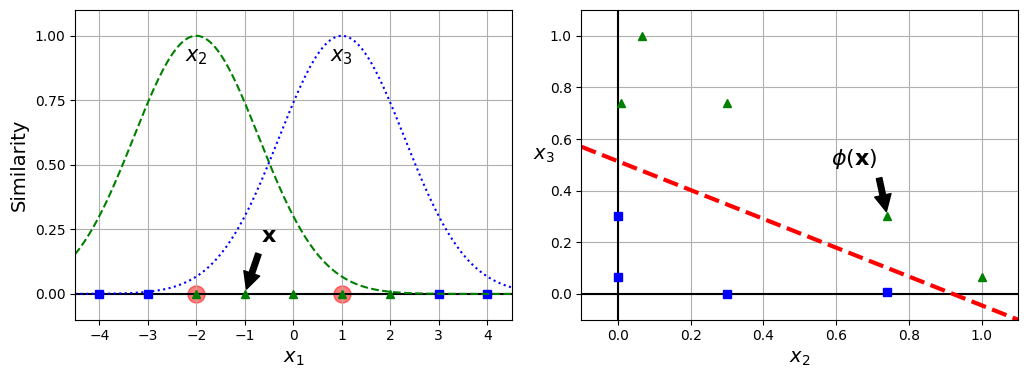

In [18]:
def gaussian_rbf(x,landmark, gamma):
  return np.exp(-gamma * np.linalg.norm(x- landmark, axis=1)**2)

gamma=0.3

x1s= np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s= gaussian_rbf(x1s, -2, gamma)
x3s= gaussian_rbf(x1s, 1 , gamma)

XK= np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk= np.array([0, 0,1,1,1,1,1,0,0])

plt.figure(figsize=(10.5,4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color="k")
'''

below line will create 2 points x=-2, y=0 and x=1, y=0 both with size 150 and point will be semitransparent with value alpha=0.5
and its color will be red.
'''
plt.scatter(x=[-2,1],y=[0,0], s=150, alpha=0.5, c="red")

plt.plot(X1D[:,0][yk==0], np.zeros(4),"bs")
plt.plot(X1D[:,0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s,"g--")
plt.plot(x1s,x3s,"b:" )
plt.gca().get_yaxis().set_ticks([0,0.25,0.5,0.75,1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r"$\mathbf{x}$",
    xy=(X1D[3,0],0),
    xytext=(-0.5,0.20),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.1),
    fontsize=16,
)

plt.text(-2,0.9,"$x_2$", ha="center", fontsize=15)
plt.text(1,0.9,"$x_3$", ha="center", fontsize=15)
plt.axis([-4.5,4.5,-0.1,1.1])


plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:,1][yk==0],"bs")
plt.plot(XK[:, 0][yk==1], XK[:,1][yk==1],"g^")

plt.xlabel("$x_2$")
plt.ylabel("$x_3$ ", rotation=0)

plt.annotate(
    r"$\phi\left(\mathbf{x}\right)$",
    xy=(XK[3,0],XK[3,1]),
    xytext=(0.65,0.50),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.1), fontsize=16)

plt.plot([-0.1,1.1],[0.57,-0.1],"r--", linewidth=3)
plt.axis([-0.1,1.1,-0.1,1.1])

plt.subplots_adjust(right=1)
save_fig("kernel_method_plot")
plt.show()


## How to select landmark?
The simple approach is to create a landmark at the location of each and every instance in the dataset.Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with m instances and n feature gets transformed into a training set with m instances and m  features (dropping original features).In case of large training set, it will end u with an equally large number of features.

## Gaussian RBF Kernel

* Similarity features are computationally expensive to compute all additional features.

* By using kernel trick now the similar result can be obtained same as added many similar features but no need to add similar features .

In below code trying with SVC class with the Gaussian RBF kernel.

In [19]:
rbf_kernel_svm_clf= make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

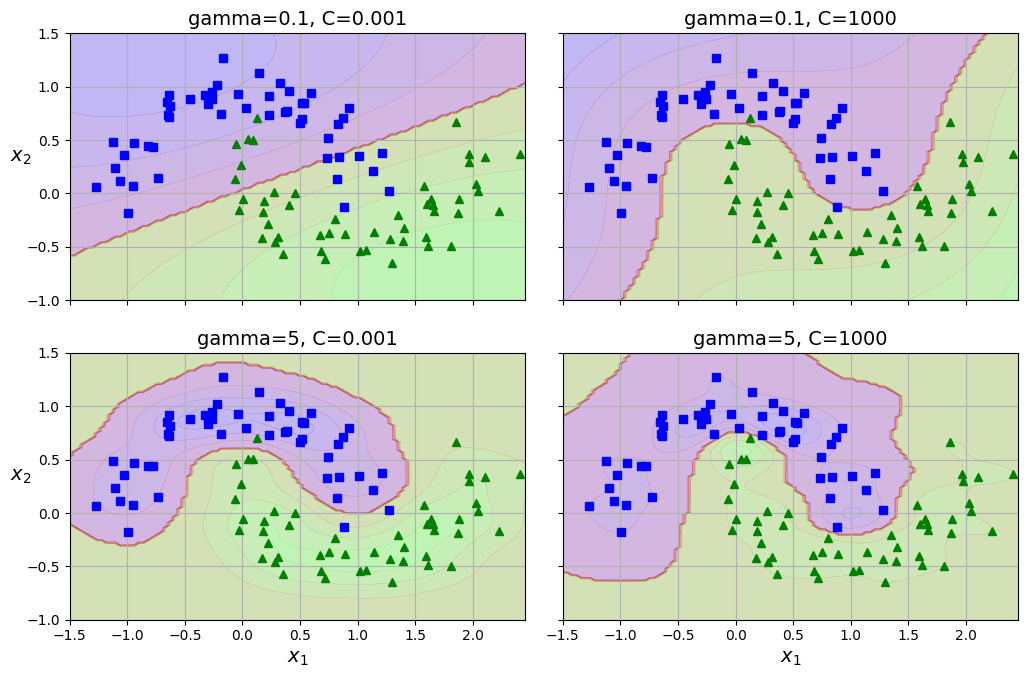

In [20]:
from sklearn.svm import SVC
gamma1, gamma2= 0.1, 5
C1, C2=0.001,1000
hyperparams=(gamma1,C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs=[]

for gamma, C in hyperparams:
  rbf_kernel_svm_clf=make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=gamma, C=C))
  rbf_kernel_svm_clf.fit(X,y)
  svm_clfs.append(rbf_kernel_svm_clf)

fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10.5,7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i//2, i % 2])
  plot_predictions(svm_clf,[-1.5,2.45,-1,1.5])
  plot_dataset(X,y,[-1.5,2.45,-1,1.5])
  gamma,C=hyperparams[i]
  plt.title(f"gamma={gamma}, C={C}")
  if i in (0, 1):
    plt.xlabel("")
  if i in (1,3):
    plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

increasing $\gamma $ makes the bell shaped curve narrower(lefthand plot above to the previous plot), small gamma makes the bell shaped curve wider.Instances have a larger range of influence and the decision boundry ends up smoother, so $\gamma $ acts like hyperparameter, if the model is overfitting then reducing $\gamma $ can help.If model is underfitting , increase $\gamma $ (Similar to `C` hyperparameter.)

*String kernel* are sometime used when classifying text documents or DNA sequences.

* Always try to use first `LinearSVC` is much faster than `SVC(kernel="linear")`, especially if the training set is very large. If training dataset is not too large then also try kernelized SVMs, starting with Gaussian RBF kernel.

## SVM classes and computational complexity

* `LinearSVC` doesn't support kernel trick.The algorithm takes longer if require very high precision.This is controlled by the tolerance hyperparameter $\epsilon$( called `tol` in Scikit-Learn)

* `SVC` is good for small or medium-sized nonlinear training set. It scales well with the number of features, especially with sparse features(when each instance has few nonzero features).

* `SGDClassifier` class also performs latge margin classification by default, its hyperparameters- especially the hyperparameters(`alpha` and `penalty`) and the `learning_rate` can be adjusted to produce similar results as the linear SVMs. For training it uses stochastic gradient descent, which allows incremental learning and uses little memory, so can train large dataset doesn't fit in memory.

<hr/>

$\begin{matrix}
\mathbf {Class} & \mathbf {Time complexity} & \mathbf {Out-of-core-support} &\mathbf {Scaling-required} & \mathbf {Kernel-trick} \\
\mathrm LinearSVC & o(m\times n) & No & Yes & NO \\
\mathrm SVC & O(m^2 \times n) to \ O(m^3 \times n) & No & Yes & Yes \\
\mathrm SGDclassifier & O(m \times n) & Yes & Yes & No
\end{matrix}$
<hr/>

## SVM Regression

SVM regression tries to fit as many instances as possible on the street is controlled by hyperparameter.

Reducing $\epsilon$ increases the number of support vectors, which regularize the model.If adding more training data it won't effect the model's prediction thus the model is said to be $ϵ$-insensitive.

In [21]:
from sklearn.svm import LinearSVR

np.random.seed(42)

X= 2 * np.random.rand(50,1)
y= 4 + 3 * X[:,0] + np.random.randn(50)

svm_reg= make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

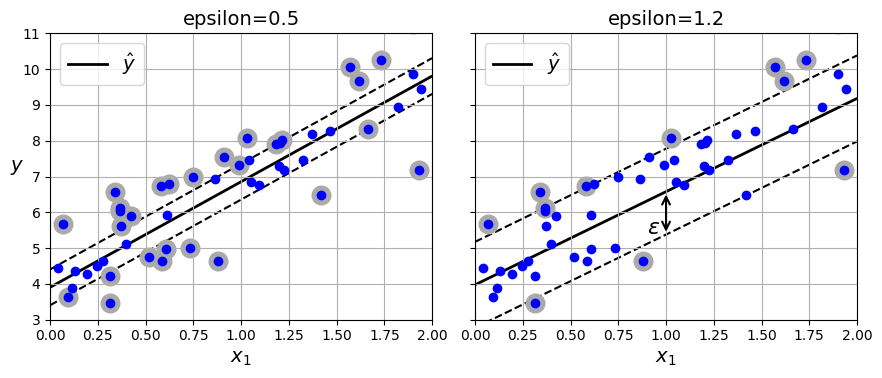

In [22]:
def find_support_vectors(svm_reg, X,y):
  y_pred= svm_reg.predict(X)
  epsilon= svm_reg[-1].epsilon
  off_margin= np.abs(y - y_pred) >= epsilon
  return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
  x1s= np.linspace(axes[0], axes[1], 100).reshape(100,1)
  y_pred= svm_reg.predict(x1s)
  epsilon=svm_reg[-1].epsilon
  plt.plot(x1s, y_pred, "k-", linewidth=2,label=r"$\hat{y}$", zorder=-2)
  plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
  plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
  plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180, facecolors='#AAA', zorder=-1)
  plt.plot(X,y, "bo")
  plt.xlabel("$x_1$")
  plt.legend(loc="upper left")
  plt.axis(axes)

svm_reg2=make_pipeline(StandardScaler(), LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X,y)

svm_reg._support= find_support_vectors(svm_reg, X,y)
svm_reg2._support= find_support_vectors(svm_reg2, X,y)

eps_x1=1
eps_y_pred= svm_reg2.predict([[eps_x1]])

fig, axes=  plt.subplots(ncols=2, figsize=(9,4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg,X,y,[0,2,3,11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X,y,[0,2,3,11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")

plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),textcoords='data',
             arrowprops={'arrowstyle':'<->', 'linewidth':1.5})
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()


To Tackle nonlinear regression tasks, can use kernelized SVM model.

In below code using a second-degree polynomial kernel, there is some regularization in the left plot(small `C` value) and much less in the right plot (a large `C` value).

In [23]:
from sklearn.svm import SVR

np.random.seed(42)
X=2 * np.random.rand(50,1) -1
y= 0.2 + 0.1 * X[:,0] + 0.5 * X[:,0] ** 2 + np.random.randn(50)/ 10

svm_poly_reg= make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))

svm_poly_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [24]:
svm_poly_reg[1].degree

2

`_support` gives indices of support vectors.

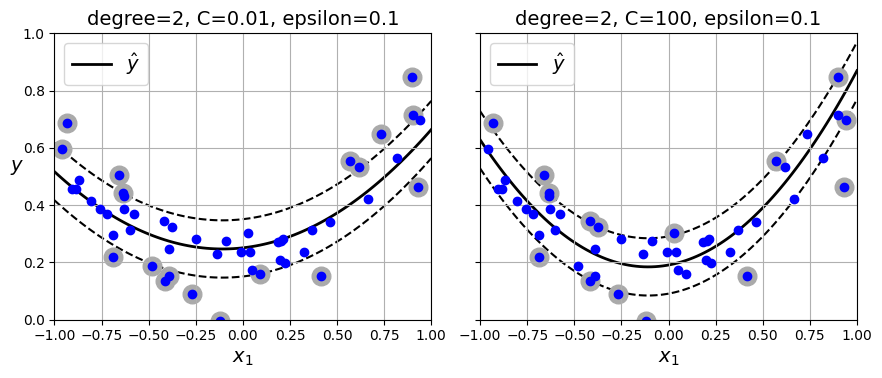

In [25]:
svm_poly_reg2= make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=100))

svm_poly_reg2.fit(X,y)

svm_poly_reg._support= find_support_vectors(svm_poly_reg, X,y)
svm_poly_reg2._support= find_support_vectors(svm_poly_reg2,X,y)

fig, axes= plt.subplots(ncols=2, figsize=(9,4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X,y,[-1,1,0,1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
 f"C={svm_poly_reg[-1].C}, " f"epsilon={svm_poly_reg[-1].epsilon}")

plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1,1,0,1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, " f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")

plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

## Under the Hood of Linear SVM Classifiers

* It predicts the class of a new instance $\mathbf x$ by first computing the **decision function** :      
$\mathbf {\theta^T X}= \theta_0 x_0 +\cdots+\theta_n x_n $

where $x_0 $ is biased feature (**always equal to 1**). If the result is positivve , then the redicted class $\hat y$ is positive class(1); otherwise it is the negative class(0). This is exactly like `LogisticRegression`.

* In all above code all the model parameters are in one $\mathbf \theta$ vector, including the bias term $\theta_0$ and the input feature weights $\mathbf \theta_1$ to $\mathbf \theta_n$. This required adding a bias input $x_0=1$ to all instances. Another way is to separate the bias term b (equal to $\theta_0$) and the feature weights vector$\mathbf w$ (containing $\theta_1$ to $\theta_n$). In this case , no bias feature needs to be added to the input feature vectors, and the **decision function** :

$\mathbf {w^T X}+b= w_1x_1+\cdots+w_nx_n+b$

* so, linear SVM classifier training need to find $w$ and $b$ that makes street , or margin, as wide as possible while limiting the number of margin violations.

In below plot, it explaining how $\mathbf w$ value decides the width of the margin, let's define the borders of the street as two points where the **decision function** is equal to $-1$ or $1$, in the left plot the weight $w_1$ is 1, so the points at which $w_1x_1=$ $-1$ or $+1$ are $x_1=-1$ and $+1$: therefre the margin's size is 2. In the right plot the weight is 0.5, so the points at which $w_1x_1=-1$ or $+1$ are $x1=-2$ and $+2$ and the margin size is 4, so we need to keep $\mathbf w$ as small as possible , the bias term b has no impact in margin width but it will just shifts the margins around, without affecting its size.

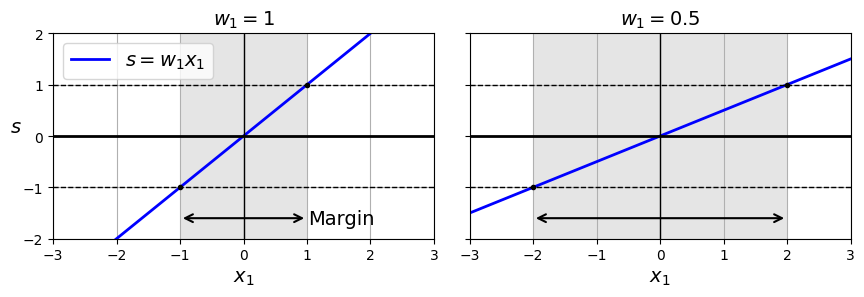

In [26]:
import matplotlib.patches as patches # it provides different classes for creating geometric shapes as rectangular, circle, polygons

def plot_2D_decision_function(w,b, ylabel=True, x1_lim=[-3,3]):
  x1= np.linspace(x1_lim[0], x1_lim[1], 200)
  y = w * x1 + b
  half_margin = 1 / w

  plt.plot(x1, y, "b-", linewidth=2, label=r"$s= w_1 x_1$") # this is mx+c line (blue)
  plt.axhline(y=0, color="k", linewidth=2)
  plt.axvline(x=0, color="k", linewidth=1)
  '''
  Ractangle((x,y), width, height,)
  (x,y) is the bottom-left corner or the rectangle
  facecolor = fill the color of ractangle to gray
  alpha set the tranparency
  '''
  rect=patches.Rectangle((-half_margin, -2), 2 * half_margin, 4, edgecolor="none", facecolor="gray", alpha=0.2)
  plt.gca().add_patch(rect)
  plt.plot([-3,3],[1,1],"k--",linewidth=1)
  plt.plot([-3,3],[-1,-1],"k--",linewidth=1)
  plt.plot(half_margin,1,"k.")
  plt.plot(-half_margin,-1,"k.")
  plt.axis(x1_lim +[-2,2])
  plt.xlabel("$x_1$")
  if ylabel:
    plt.ylabel("$s$", rotation=0, labelpad=5)
    plt.legend()
    plt.text(1.02,-1.6, "Margin", ha="left", va="center", color="k")

  plt.annotate('',xy=(-half_margin, -1.6), xytext=(half_margin, -1.6), arrowprops={'ec':'k',"arrowstyle":"<->", "linewidth":1.5})
  plt.title(f"$w_1={w}$")

fig, axes=plt.subplots(ncols=2, figsize=(9,3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1,0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5,0, ylabel=False)
plt.grid()
save_fig("small_w_large_margin_plot")
plt.show()

To avoid margin violations, need a decision function to be greater than 1 for all positive training instances and lower than -1 for negative training instances. If $t^{(i)}= -1$ for negative instances (when $y^{(i)}=0$) and $t^{(i)}=1$ for positive instances (when $y^{(i)}=1$), then this constraint can be written as $t^{(i)}(\mathbf {w^T x^{(i)}+b})>=1$ for all instances.

therefore the hard margin linear SVM classifier objective as the constrained optimization

**Hard margin linear SVM classifier objective**

$ \underset{w,b} {minimize} \ \dfrac{1}{2} \mathbf {w^T w }$

subject to $t^{(i)}(\mathrm {w^T x^{(i)}}+b)>=1 \ for \ i=1,2,\cdots,m$

Note: we need to minimize $ \dfrac{1}{2} \mathbf {w^T w }$, which is equal to $\dfrac{1}{2} ||\mathbf w||^2$ as derivative for $\dfrac{1}{2} ||\mathbf w||^2$ is just $\mathrm w$, while $||\mathbf w||$ is not diffrentiable at $\mathrm w=0$. Optimization algorithms often work much better on differentiable functions.

To get the soft margin objective, it needs slack variable $\mathbf \zeta^{(i)}>=0  $ for each instance:
$\mathbf \zeta^{(i)}$ measures how much the $i^{(th)}$ instance is allowed to violate the margin.

Now we have two conflicting objectives:  make the slack variables as small as possible to reduce the margin violations, and make $\dfrac{1}{2}\mathbf{w^Tw}$ as small as possible to increate the margin. This is where the `C` hyperparameter comes in: it allows us to define the trade-off between these two objecttive. This gives us the constrained optimization problem.

**Soft margin linear SVM classifier objective**

$ \underset {w,b,\zeta}{minimize} \ \dfrac{1}{2} \mathbf{w^Tw} + C \ \sum_{i=1}^m \mathbf {\zeta^{(i)}}$

subject to $t^{(i)}(w^Tx^{(i)}+b)>= 1 - \zeta^{(i)}$ and $\zeta^{(i)}>=0 \ for \ i=1,2,\cdots,m$

The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints. Such problems are known as quadratic programming (QP) problems.

QP is one way to train SVM.
gradient descent is also used to minimize the hinge loss or the squared hinge loss for given an instance $\mathbf x$ of the positive class (i.e., with t=1), the loss is 0 if the output s of the dicision function $(s=\mathbf {w^Tx+b})$ is greater than or equal to 1. This happens when the instance is off the street and on the positive side. Given an instance of the negative class (i.e., with t=-1), the loss is 0 if $s<=-1$. This happens when the instance is off the street and on te negative side.

The higher the loss: it grows linearly for the hinge loss, and quadratically for the squared hinge loss. This makes the sqared hinge loss more sensitive to outliers. However if the dataset is clean , it tends to converge faster.By default `LinearSVC` uses the squared hinge loss, while `SGDClassifier` uses the hinge loass. Both classes allow to choose the loss by setting the `loss` hyperparameter to `hinge` or  squared_hinge`.

The `SVC` class's optimization algorithm finds a similar solution as minimizing the hinge loss.

hinge_neg 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00753769 0.03266332 0.05778894 0.08291457 0.1080402  0.13316583
 0.15829146 0.18341709 0.20854271 0.23366834 0.25879397 0.2839196
 0.30904523 0.33417085 0.35929648 0.38442211 0.40954774 0.43467337
 0.45979899 0.48492462 0.51005025 0.53517588 0.56030151 0.58542714
 0.61055276 0.63567839 0.66080402 0.68592965 0.71105528 0.7361809
 0.76130653 0.78643216 0.81155779 0.83668342 0.86180905 0.8869346

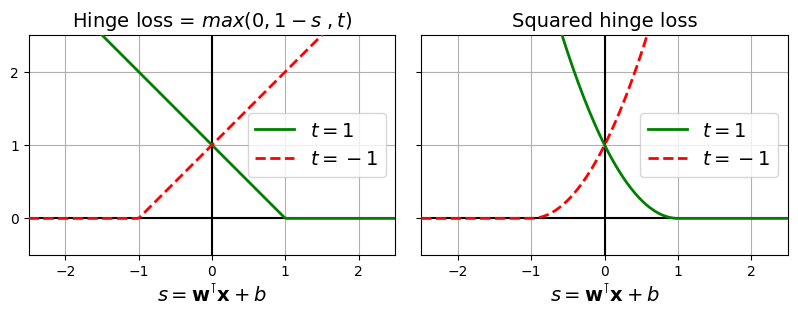

In [27]:
s=np.linspace(-2.5,2.5,200)

hinge_pos= np.where(1 - s < 0, 0, 1 - s) #max(0,1-s)
hinge_neg= np.where(1 + s < 0, 0, 1 + s) #max(0, 1+s)
print("hinge_neg \n",hinge_neg)
print("---------------------------")
titles=(r"Hinge loss = $max(0,1-s\ ,t)$", "Squared hinge loss")

fig,axs=plt.subplots(1,2,sharey=True, figsize=(8.2,3))


for ax, loss_pos, loss_neg, title in zip(
    axs, (hinge_pos, hinge_pos**2), (hinge_neg, hinge_neg **2), titles):
  print("ax \n",ax)
  print("---------------------------")
  print("loss_pos \n",loss_pos.shape)
  print("---------------------------")
  print("loss_neg \n",loss_neg.shape)
  print("---------------------------")
  print("title \n",title)
  print("---------------------------")
  ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
  ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
  ax.grid(True)
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} +b$")
  ax.axis([-2.5,2.5,-0.5,2.5])
  ax.legend(loc="center right")
  ax.set_title(title)
  ax.set_yticks(np.arange(0,2.5,1))
  ax.set_aspect("equal")

save_fig("hinge_plot")
plt.show()




## The Dual Problem


In given constrained optimization problem, known as the *primal problem*, it is possible to express a different but closely related problem , called its *dual problem*.
The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it can have the same solution a the primal problem. The SVM problem happens to meet these conditions so we can choose to solve the primal problem or the dual problem; both will have the same solution.

**Dual form of the linear SVM objective**

$\underset \alpha {minimize} \dfrac{1}{2} \sum_{1=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} \mathrm t^{(i)}\mathrm t^{(j)} \mathrm x^{(i)} \mathrm x^{(j)} -\sum_{i=1}^m \mathrm \alpha^{(i)} \mathrm{subject \ to} \ \alpha^{(i)} >=0 \ for \ all \ i=1,2,\cdots,m $

to minimize the above equation need to find $\hat \alpha$.

To compute the $\mathbf{\hat{ w}}$ and $\mathrm b$ that minimize the primal problem. In below equation $n_s$ represents the number of support vectors.


$\mathbf{\hat{w}}= \sum_{i=1}^m \hat\alpha^{(i)} \ t^{(i)} \ \mathbf x^{(i)}$

$\hat b= \dfrac{1}{n_s} \underset{\hat\alpha^{(i)}>0} {\ \sum_{i=1}^m} t^{(i)}-\hat{\mathbf w}^T \mathbf{x^{(i)}}$


* Dual problem is faster to solve than the primal one  when the number of training instances is smaller than the number of features. More important dual problem makes the kernel trick possible, while the primal problem does not.

## Kernelized SVMs

NOTE: Given variables a, b are vectors and not scalers in this note.

For example: In case second-degree polynomial transformation need to apply a 2-dimensional training set, then train a linear SVM classifier on the transformed training set, below equation shows the second-degree polynomial mapping function $\mathrm \phi$ that we want to apply.

**Second-degree polynomial mapping**

$\mathrm{\phi(x)=\phi \begin{pmatrix}  x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix}
x_1^2 \\ \sqrt{2}x_1x_2 \\ x_2^2
\end{pmatrix}}$

NOTE: in above equation , the transformed vector is 3D instead of 2D.

Now when we apply the above equation to 2D vector (in example it is for 2D, 2 features are there) , when apply 2nd degree polynomial mapping and then compute the dot product of the transformed vectors, it will be like below.

**Kernel trick for a second-degree polynomial mapping**


a and b are 2 different vecotrs (2X1).

$\mathrm{\phi(a)^T\phi(b)}=\begin{pmatrix}
a1^2 \\ \sqrt{2}a_1 a_2 \\ a_2^2
\end{pmatrix}^T \begin{pmatrix} b_1^2 \\ \sqrt{2}b_1 b_2 \\ b_2^2\end{pmatrix}= a_1^2b_1^2+2a_1b_1a_2b_2+a_2^2b_2^2=(a_1b_1+a_2b_2)^2= \begin{pmatrix}\begin{pmatrix} a_1 \\ a_2 \end{pmatrix}^T \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}\end{pmatrix}^2=(a^T b)^2$

SO, the dot product of the transformed vectors is equal to the square of the dot product of the original vecotrs:
$\mathbf{\phi(a)^T} \phi(b)=(a^T b)^2$

key insight: when apply the transformation $\phi$ to all training instances, then the dual problem will contain the dot product $\phi(x^{(i)})^T\phi(x^{(j)})$. But if $\phi$ is the second-degree polynomial transformation defined in then we can replace this dot product of transformaed vectors simply by $\begin{pmatrix}
\mathbf{x^{(i)T}x^{(j)}}
\end{pmatrix}^2$.

So we don't need to transform the training instances at all; just replace the dot product by its square in below equation, and the result will be same as transforming the training set and then fitting a linear SVM algorithm, but this trick makes the whole process much more computationally efficient.


**Dual form of the linear SVM objective**

$\underset \alpha {minimize} \dfrac{1}{2} \sum_{1=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)} \mathrm t^{(i)}\mathrm t^{(j)} \mathrm x^{(i)} \mathrm x^{(j)} -\sum_{i=1}^m \mathrm \alpha^{(i)} \mathrm{subject \ to} \ \alpha^{(i)} >=0 \ for \ all \ i=1,2,\cdots,m $


The function $K(a,b)= (a^Tb)^2$ is a second-degree polynomial kernel.

**In Machine learning a *kernel* is a function capable of computing the dot product $\phi(a)^T \phi(b)$**, based only on the original vectors a and b, without having to compute the transformation $\phi$


**Common Kernels**

$ \begin{matrix} Linear: &  K(a,b)= a^T b \\
Polynomial: & K(a,b)=\gamma (a^Tb+r)^d \\
Gaussian \ RBF: & K(a,b)= exp(-\gamma ||a- b||^2)\\
Sigmoid: & K(a,b)=tanh \ \gamma(a^Tb+r)
\end{matrix} $


According to Mercer's theorem, if a function K(a,b) respects a few mathematical conditions called Mercer's conditions (K must be continuous and symmetric in its arguments so that K(a,b)=K(b,a), then there exist a function $\phi$ that maps a and b into another space (possibly with much higher dimensions) such that $K(a,b)= \phi(a)^T \phi(b)$. Can use K kernel as we know $\phi$ exist, even if we don't know what is $\phi$.In the case of the Gaussian RBF kernel, it can be shown that ϕ maps each training instance to an infinite-dimensional space, so it’s a good thing you don’t need to actually perform the mapping!


Still need to find a way to go from the dual solution to the primal solution in the case of a linear SVM classifier. But if we apply the kernel trick , it will end up with qtuations that include $\phi (x^{(i)})$. In fact $\mathbf {\hat w}$ must have the same number of dimension as $\phi (x^{(i)})$, which may be huge or even infinite, and that is not possible to compute that , now how can we make prediction without knowing $\mathbf {\hat w}$?  Answer is , can plug the formula for ${\mathbf{\hat {w}}} $ from

$\mathbf{\hat{w}}= \sum_{i=1}^m \hat\alpha^{(i)} \ t^{(i)} \ \mathbf x^{(i)}$

$\hat b= \dfrac{1}{n_s} \underset{\hat\alpha^{(i)}>0} {\ \sum_{i=1}^m} t^{(i)}-\hat{\mathbf w}^T \mathbf{x^{(i)}}$

into the decision function for a new instance $\mathbf{x^{(n)}}$ and that will produce equation with only dot product between input vectors. This makes it possible to use the kernel trick





## Linear SVM classifier implementation using Batch Gradient Descent

In [28]:
X= iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target==2)

In [29]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
  def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
    self.C=C
    self.eta0=eta0
    self.n_epochs=n_epochs
    self.random_state = random_state
    self.eta_d= eta_d

  def eta(self, epoch):
    return self.eta0 /(epoch + self.eta_d)

  def fit(self, X,y):
    if self.random_state:
      np.random.seed(self.random_state)

    w= np.random.randn(X.shape[1],1) #n feature weights
    b=0

    t=np.array(y, dtype=np.float64).reshape(-1,1) *2 -1
    X_t= X * t
    self.Js=[]


    #training
    for epoch in range(self.n_epochs):
      support_vectors_idx= (X_t.dot(w) + t * b <1).ravel()
      X_t_sv= X_t[support_vectors_idx]
      t_sv=t[support_vectors_idx]

      J=1/2 * (w * w).sum() + self.C * ((1- X_t_sv.dot(w)).sum() - b * t_sv.sum())

      self.Js.append(J)

      w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1,1)
      b_derivative=-self.C * t_sv.sum()

      w= w - self.eta(epoch) * w_gradient_vector
      b= b - self.eta(epoch) * b_derivative


    self.intercept_= np.array([b])
    self.coef_= np.array([w])
    support_vectors_idx= (X_t.dot(w) + t * b <1).ravel()
    self.support_vectors_= X[support_vectors_idx]
    return self

  def decision_function(self, X):
    return X.dot(self.coef_[0]) + self.intercept_[0]

  def predict(self, X):
    return self.decision_function(X) >=0

In [30]:
C=2
svm_clf=MyLinearSVC(C=C, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)

svm_clf.fit(X,y)
svm_clf.predict(np.array([[5,2],[4,1]]))

array([[ True],
       [False]])

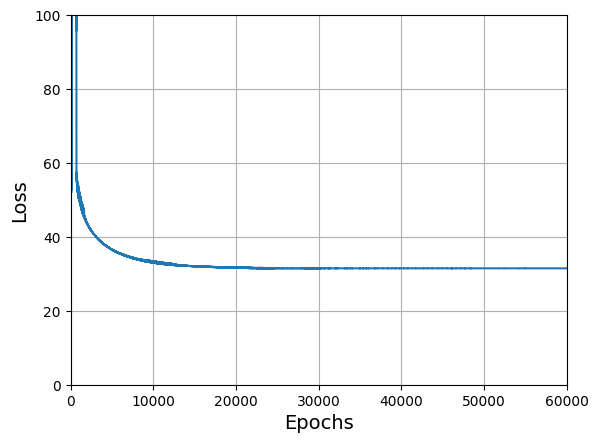

In [31]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [32]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [33]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


MyLinearSVC(C=2, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)
-15.56761652854115
SVC(C=2, kernel='linear')
-15.517212533139803


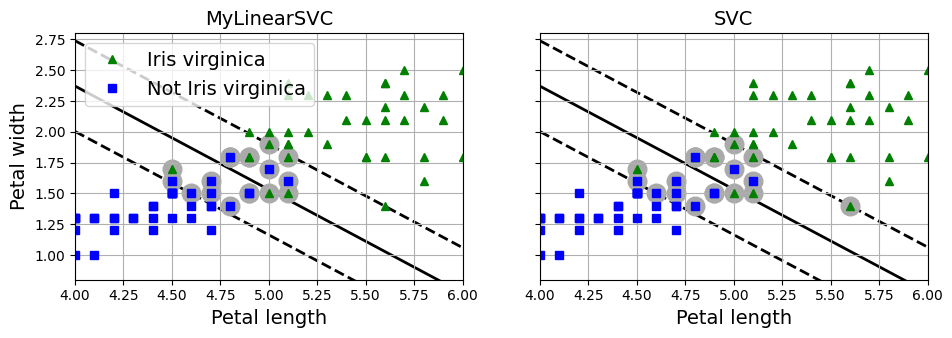

In [34]:
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.title("SVC")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

[-12.52988101   1.94162342   1.84544824]
SGDClassifier(alpha=0.017, random_state=42)
-12.529881014779779


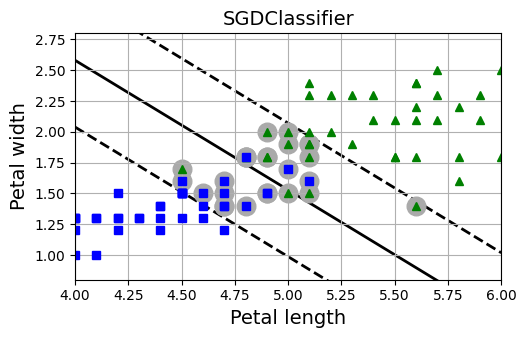

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3,
                        random_state=42)
sgd_clf.fit(X, y)

m = len(X)
t = np.array(y).reshape(-1, 1) * 2 - 1  # -1 if y == 0, or +1 if y == 1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("SGDClassifier")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

## Excercises

1. What is the fundamental idea behind support vector machines?

- To fit the widest possible "street" between classes.

2. What is a support vector?

- Support vector is any instance located on the "street" including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street) has no influence ; could remove them, add more instances , or move them around, and as long as they stay off the street they won't affect the decision boundary.

Computing the predictions with a kernerlized SVM only involves the support vectors, not the whole training set.

3. Why is it important to scale the inputs when using SVMs?

- if not scale then SVM will neglect small features.

4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

- can use `decision_function()` method to get confidence score. These scores represent the distance between the instance and the decision boundary.however they cannot be directly converted into an estimation of the class probability. If set `probability=True` when creating an `SVC`, then at the end of training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, and it will train a `LogisticRegression` model to map these scores to estimated probabilities. The `predict_proba()` and `predict_log_proba()` methods will then be available.

5. How can you choose between LinearSVC, SVC, and SGDClassifier?

- All three can be used for large-margin linear classification. The `SVC` also supports *kernel trick* which makes it capable of handling nonlinear tasks. `SVC ` doesnot scale well to a large dataset with mny instances. It does scale well to a large number of features. `LinearSVC` implements an optimized algorith for linear SVMs.`SGDClassifier` uses Stochastic Gradient Descent. `SGDClassifier ` is more flexible , plus it supports incremental learning.

6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?

- It could be because of too much regulariation. To decrease it need to increase `gamma` or `C` (or both)


7. What does it mean for a model to be ϵ-insensitive?

- A Regression SVM model tries to fit as many instances with a small margin around its predictions. If we try to add instances within this margin, the model will not be affected at all: it is said to be $\epsilon$-insensitive.

8. What is the point of using the kernel trick?

- The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformaton, then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result without having to transform the inputs at all.

9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [36]:
from sklearn import datasets

iris=datasets.load_iris(as_frame=True)

X=iris.data[["petal length (cm)","petal width (cm)"]].values
y=iris.target

setosa_or_versicolor= (y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

Now let's build and train 3 models:

* `LinearSVC` uses `loss="suared_hinge` by default, so if we want all 3 models to product similar results, we need to set `loss="hinge`.

* The `SVC` class uses an RBF kernel by default , so we need to set `kernel="Linear"` to get similar  result as other two models.

* The `SGDClassifier` class does not have a `C` hyperparameter, but it has another regulariation hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [37]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C=5
alpha= 0.05

scalar=StandardScaler()

X_scaled=scaler.fit_transform(X)

lin_clf= LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)

svc_clf=SVC(kernel="linear", C=C).fit(X_scaled,y)
sgd_clf=SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

Now, Plotting the decision boundaries of these three models:

-model.coef_[0,0]/ model.coef_[0,1] 
 -0.9587007015533304
-model.intercept_[0]/ model.coef_[0,1] 
 -0.2590911023446184
-model.coef_[0,0]/ model.coef_[0,1] 
 -1.0916699535467225
-model.intercept_[0]/ model.coef_[0,1] 
 -0.3108091759144387
-model.coef_[0,0]/ model.coef_[0,1] 
 -1.1018407916232449
-model.intercept_[0]/ model.coef_[0,1] 
 -0.3625453884826772


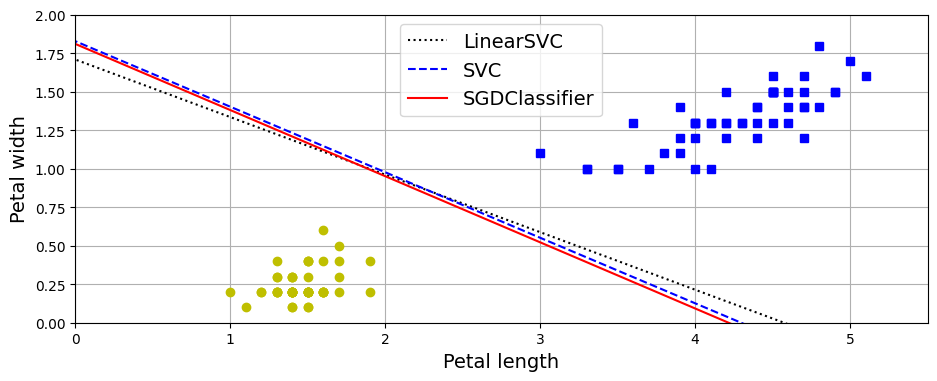

In [38]:
def compute_decision_boundary(model):
  print("-model.coef_[0,0]/ model.coef_[0,1] \n",-model.coef_[0,0]/ model.coef_[0,1])
  print("-model.intercept_[0]/ model.coef_[0,1] \n",-model.intercept_[0]/ model.coef_[0,1])
  w= -model.coef_[0,0]/ model.coef_[0,1]
  b= -model.intercept_[0]/ model.coef_[0,1]
  return scaler.inverse_transform([[-10,-10 *w+b],[10, 10* w+ b]])

lin_line=compute_decision_boundary(lin_clf)
svc_line=compute_decision_boundary(svc_clf)
sgd_line=compute_decision_boundary(sgd_clf)

#plot all three decision boundaries
plt.figure(figsize=(11,4))
plt.plot(lin_line[:,0], lin_line[:,1],"k:",label="LinearSVC")
plt.plot(svc_line[:,0], svc_line[:,1],"b--",label="SVC")
plt.plot(sgd_line[:,0], sgd_line[:,1],"r-",label="SGDClassifier")
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs") #label= "Iris versicolor"
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo") #label= "Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0,5.5,0,2])
plt.grid()
plt.show()


10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

In [39]:
from sklearn.datasets import load_wine

wine= load_wine(as_frame=True)

In [40]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(wine.data, wine.target, random_state=42)

In [42]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [43]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

Using Linear SVM classifier and this will automatically use the One-vs-ALL strategy, so there's nothing special we need to do to handle multiple classes.

In [44]:
lin_clf= LinearSVC(max_iter=1_000_000,dual=True, random_state=42)
lin_clf.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=1000000, random_state=42)

Even with one million iterations, it still did not converge, now will find the problem why?

now we will evluate this model with `cross_val_score`, it will serve as a baseline

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf,X_train, y_train).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.90997150997151

91% accuracy on this dataset is not great.

feature scaling is absent! feature scaling is important when using SVMs

In [46]:
lin_clf=make_pipeline(StandardScaler(), LinearSVC(dual=True, random_state=42))

lin_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

Now it converges without any problem. Let's measure its performance:

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775

97.7% is good

Now will check with kernelized SVM if it can do better.

In [48]:
svm_clf=make_pipeline(StandardScaler(), SVC(random_state=42))

cross_val_score(svm_clf, X_train, y_train).mean()

0.9698005698005698

this is not better result so will try to check with hyperparameter tuning.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib= {
    "svc__gamma": loguniform(0.001, 0.1),
    "svc__C": uniform(1,10)
}

rnd_search_cv= RandomizedSearchCV(svm_clf, param_distrib, n_iter=100,cv=5, random_state=42)

rnd_search_cv.fit(X_train,y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=9.925589984899778, gamma=0.011986281799901188,
                     random_state=42))])

In [50]:
rnd_search_cv.best_score_

0.9925925925925926

Now this looks great, and we can select this model  to test.

In [51]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

This tuned kernelized SVM performs better than the `LinearSVC` model, but we get a lower score on the test set then we measured using cross-validation. Since we did so much hyperparameter tuning, we ended up slightly overfitting the cross-validation test sets. We can further tweak hyperparameter untill we get better reult for test set but this would probably not help, as we would just start overfitting the test set.

11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE?

In [52]:
from sklearn.datasets import fetch_california_housing

housing= fetch_california_housing()

X= housing.data
y=housing.target



Split it into a training set and test set:

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

Scale data and use `LinearSVM` first

In [55]:
from sklearn.svm import LinearSVR

lin_svr= make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=42))

lin_svr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42))])

To converge increasing the `max_iter`:

In [56]:
lin_svr=make_pipeline(StandardScaler(), LinearSVR(max_iter=5000, dual=True, random_state=42))

lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=5000, random_state=42))])

Now will check how it perform on training set.

In [57]:
from sklearn.metrics import mean_squared_error

y_pred=lin_svr.predict(X_train)
mse= mean_squared_error(y_train, y_pred)

mse

0.9595484665813285

Now checking with RMSE

In [58]:
np.sqrt(mse)

0.979565447829459

In this dataset, the target represent hundreds of thousands of dollars. The RMSE gives a rough idea of the kind of error (with a higher weight for large error): so with this model we an expect errors close to $98000 ! So this is good model, now checking with RBF kernel. will use randomized search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`.

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg= make_pipeline(StandardScaler(), SVR())

param_distrib={
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1,10)
}

rnd_search_cv= RandomizedSearchCV(svm_reg, param_distrib, n_iter=100, cv=3, random_state=42)

rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c8ae6c01e10>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c8ae6c009d0>},
                   random_state=42)

In [62]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [63]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train,y_train, scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [64]:
y_pred= rnd_search_cv.best_estimator_.predict(X_test)

rmse= mean_squared_error(y_test,y_pred, squared=False)
rmse

0.5854732265172238

so SVM works well with Wine dataset. but not so much on the California Housing dataset, and we should try other model like RandomForst